## Ames Housing Prices
___
House Prices - Advanced Regression Techniques

* Creative feature engineering
* RMSE
* Predict housing prices based on home features
* Dataset compiled by Dean de Cock

In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

print(f'np=={np.__version__}')
print(f'pd=={pd.__version__}')
print(f'sns=={sns.__version__}')

np==1.26.1
pd==2.1.2
sns==0.13.0


### Import dataset
___
* 81 features
* target col SalePrice

In [220]:
df_train = pd.read_csv('../data/raw/train.csv')
df_train.shape

(1460, 81)

In [221]:
for col in df_train.columns:
    print(col)

"""
Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
"""

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


'\nId\nMSSubClass\nMSZoning\nLotFrontage\nLotArea\nStreet\nAlley\nLotShape\nLandContour\nUtilities\nLotConfig\nLandSlope\nNeighborhood\nCondition1\nCondition2\nBldgType\nHouseStyle\nOverallQual\nOverallCond\nYearBuilt\nYearRemodAdd\nRoofStyle\nRoofMatl\nExterior1st\nExterior2nd\nMasVnrType\nMasVnrArea\nExterQual\nExterCond\nFoundation\nBsmtQual\nBsmtCond\nBsmtExposure\nBsmtFinType1\nBsmtFinSF1\nBsmtFinType2\nBsmtFinSF2\nBsmtUnfSF\nTotalBsmtSF\nHeating\nHeatingQC\nCentralAir\nElectrical\n1stFlrSF\n2ndFlrSF\nLowQualFinSF\nGrLivArea\nBsmtFullBath\nBsmtHalfBath\nFullBath\nHalfBath\nBedroomAbvGr\nKitchenAbvGr\nKitchenQual\nTotRmsAbvGrd\nFunctional\nFireplaces\nFireplaceQu\nGarageType\nGarageYrBlt\nGarageFinish\nGarageCars\nGarageArea\nGarageQual\nGarageCond\nPavedDrive\nWoodDeckSF\nOpenPorchSF\nEnclosedPorch\n3SsnPorch\nScreenPorch\nPoolArea\nPoolQC\nFence\nMiscFeature\nMiscVal\nMoSold\nYrSold\nSaleType\nSaleCondition\nSalePrice\n'

In [222]:
df_train.info()

# high null frequency columns
# - Alley               Type of alley access to property
# - MasVnrType          Masonry veneer type
# - FireplaceQu         Fireplace quality
# - PoolQC              Pool quality
# - Fence               Fence quality
# - MiscFeature         Miscellaneous feature not covered in other categories

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [223]:
freq_null_cols = []
for col in df_train.columns:
    null_freq = df_train[col].isnull().sum()/df_train[col].shape[0]
    if null_freq > 0.8:
        freq_null_cols.append(col)
        print(f"{col} has null frequency of : {null_freq}")

df_train = df_train.drop(columns=freq_null_cols)
df_train.shape

Alley has null frequency of : 0.9376712328767123
PoolQC has null frequency of : 0.9952054794520548
Fence has null frequency of : 0.8075342465753425
MiscFeature has null frequency of : 0.963013698630137


(1460, 77)

In [224]:
# heavily skewed columns
for col in df_train.columns:
    if df_train[col].nunique() < 3:
        print(df_train[col].value_counts())

Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
CentralAir
Y    1365
N      95
Name: count, dtype: int64


In [225]:
# heavily skewed split, non important feature
skew_value_cols = ['Street', 'Utilities']
df_train = df_train.drop(columns=skew_value_cols)
df_train.shape

# further measuring cardinality
# for col in df_train.columns:
#     unq_count = df_train[col].nunique()
#     cardinality = unq_count / df_train[col].count()
#     if cardinality < 0.1: 
#         print(f"{col} {cardinality}")
#         value_counts = df_train[col].value_counts()
#         print(value_counts)

(1460, 75)

In [226]:
df_obj = df_train.select_dtypes(include=object)
df_num = df_train.select_dtypes(include=np.number)

print(f"Numberic features : {df_num.shape[1]}")
print(f"  Object features : {df_obj.shape[1]}") # non numeric

Numberic features : 38
  Object features : 37


In [227]:
# NOTE Condition rankings
# -----------------------
# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# Po	Poor
# NA    No Garage
conditions = ["Ex", "Gd", "TA", "Fa", "Po"][::-1]


# GLQ	Good Living Quarters
# ALQ	Average Living Quarters
# BLQ	Below Average Living Quarters	
# Rec	Average Rec Room
# LwQ	Low Quality
# Unf	Unfinshed
# NA	No Basement


# Gd	Good Exposure
# Av	Average Exposure (split levels or foyers typically score average or above)	
# Mn	Mimimum Exposure
# No	No Exposure
# NA	No Basement

# Typ	Typical Functionality
# Min1	Minor Deductions 1
# Min2	Minor Deductions 2
# Mod	Moderate Deductions
# Maj1	Major Deductions 1
# Maj2	Major Deductions 2
# Sev	Severely Damaged
# Sal	Salvage only


# Fin	Finished
# RFn	Rough Finished	
# Unf	Unfinished
# NA	No Garage

# NOTE Fence quality
# GdPrv	Good Privacy
# MnPrv	Minimum Privacy
# GdWo	Good Wood
# MnWw	Minimum Wood/Wire
# NA	No Fence


ExterQual = pd.Categorical(values=df_obj["ExterQual"], categories=conditions, ordered=True)
print(ExterQual)

# numerical num
# categorical cat
# nominal nom
# ordinal ord



df_obj.shape

['Gd', 'TA', 'Gd', 'TA', 'Gd', ..., 'TA', 'TA', 'Ex', 'TA', 'Gd']
Length: 1460
Categories (5, object): ['Po' < 'Fa' < 'TA' < 'Gd' < 'Ex']


(1460, 37)

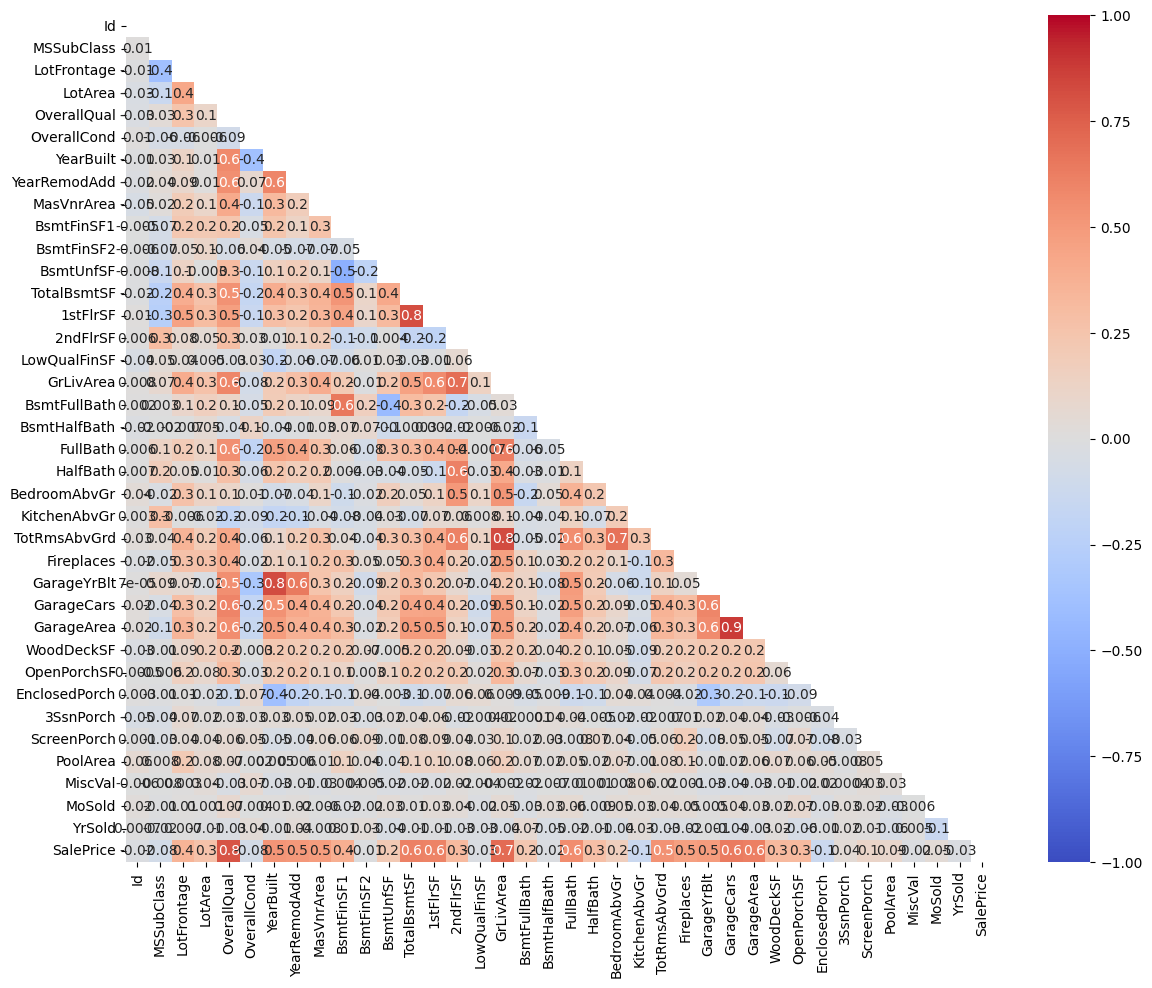

In [228]:
corr_num = df_num.corr()
mask = np.zeros_like(a=corr_num, dtype=bool)
triu = np.triu_indices_from(arr=corr_num)
mask[triu] = True

plt.figure(num=3, figsize=(14, 11))
sns.heatmap(data=corr_num, mask=mask, cbar=True, vmin=-1, vmax=1, center=0, cmap="coolwarm", annot=True, fmt=".1g")
plt.show()

NOTE: High correlation between GarageCars & GarageArea

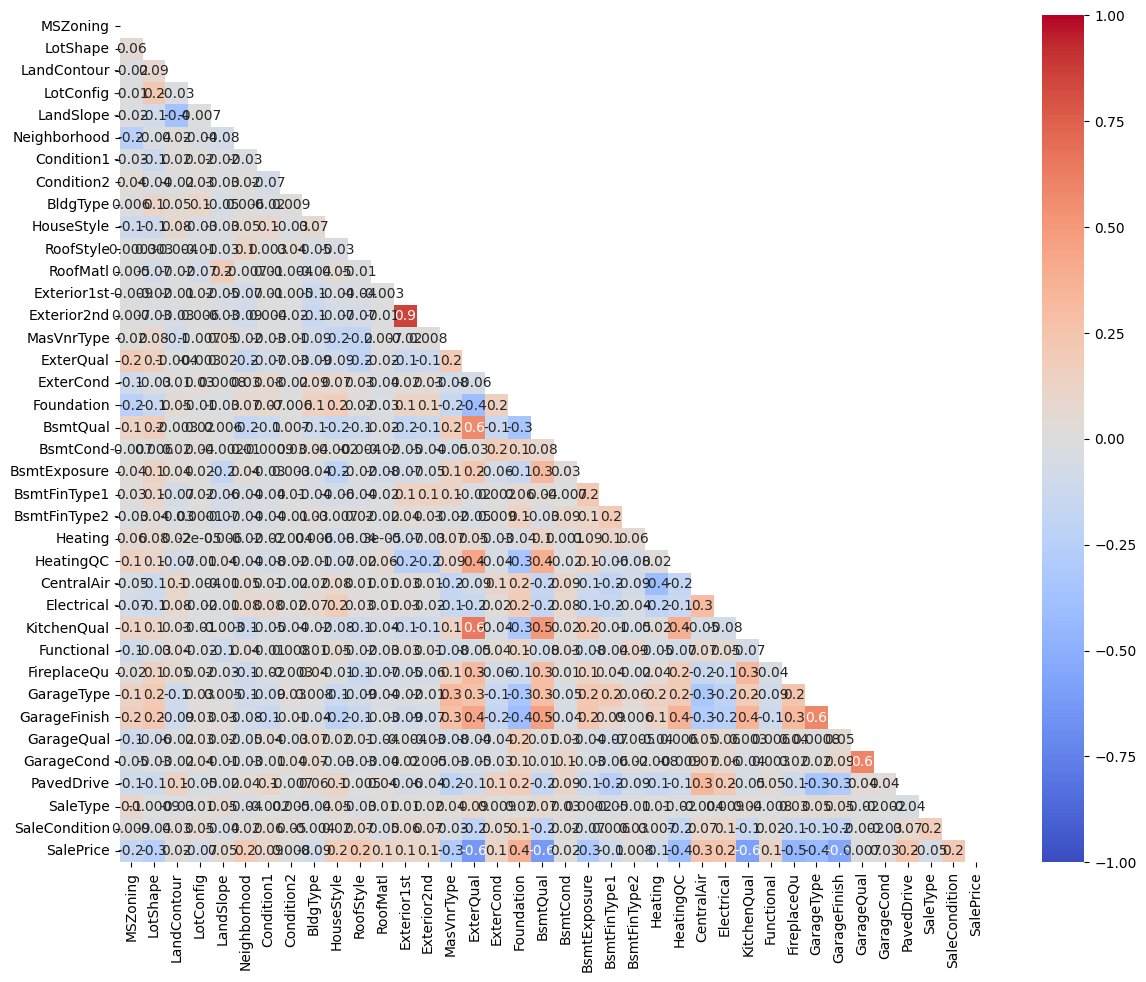

In [229]:
# Encode categorical object features as numerical for analysis
df_obj = df_obj.transform(func=lambda x: LabelEncoder().fit_transform(y=x))

df_obj.insert(loc=df_obj.shape[1], value=df_num["SalePrice"], column="SalePrice")
corr_obj = df_obj.corr()
mask = np.zeros_like(a=corr_obj, dtype=bool)
triu = np.triu_indices_from(arr=corr_obj)
mask[triu] = True

plt.figure(num=3, figsize=(14, 11))
sns.heatmap(data=corr_obj, mask=mask, cbar=True, vmin=-1, vmax=1, center=0, cmap="coolwarm", annot=True, fmt=".1g")
plt.show()

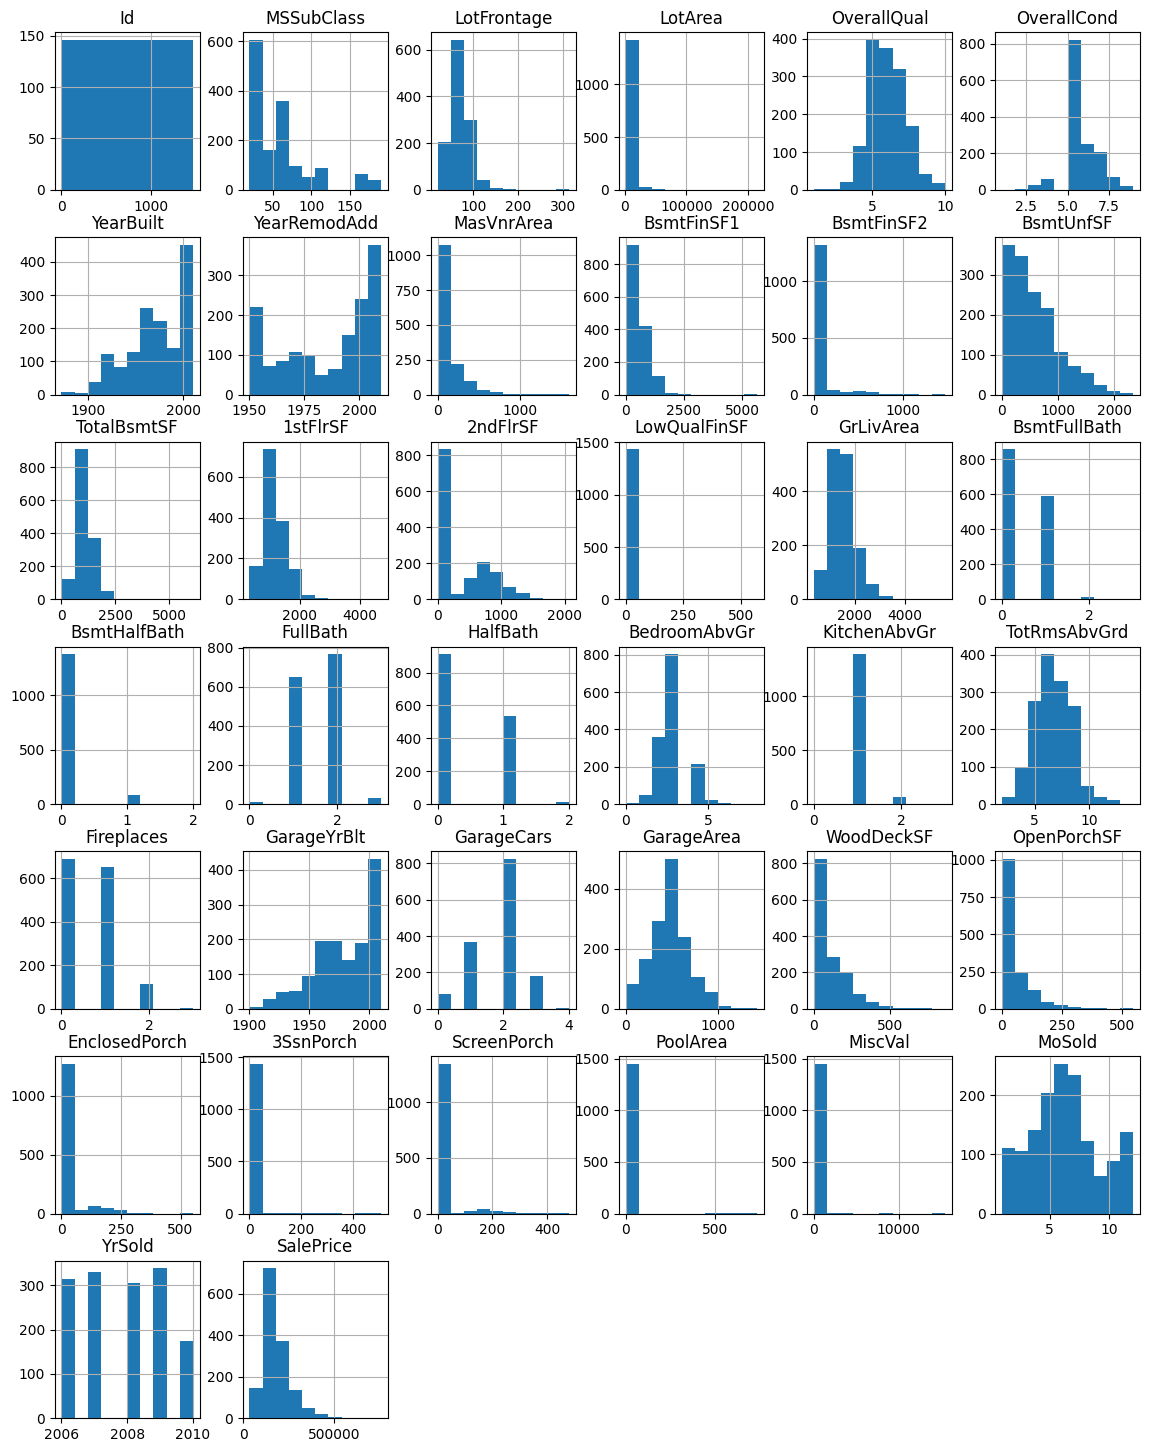

In [230]:
# df_num = df_num.transform(func=lambda x: np.log(x+1))
df_num.hist(figsize=(14, 18))
plt.show()

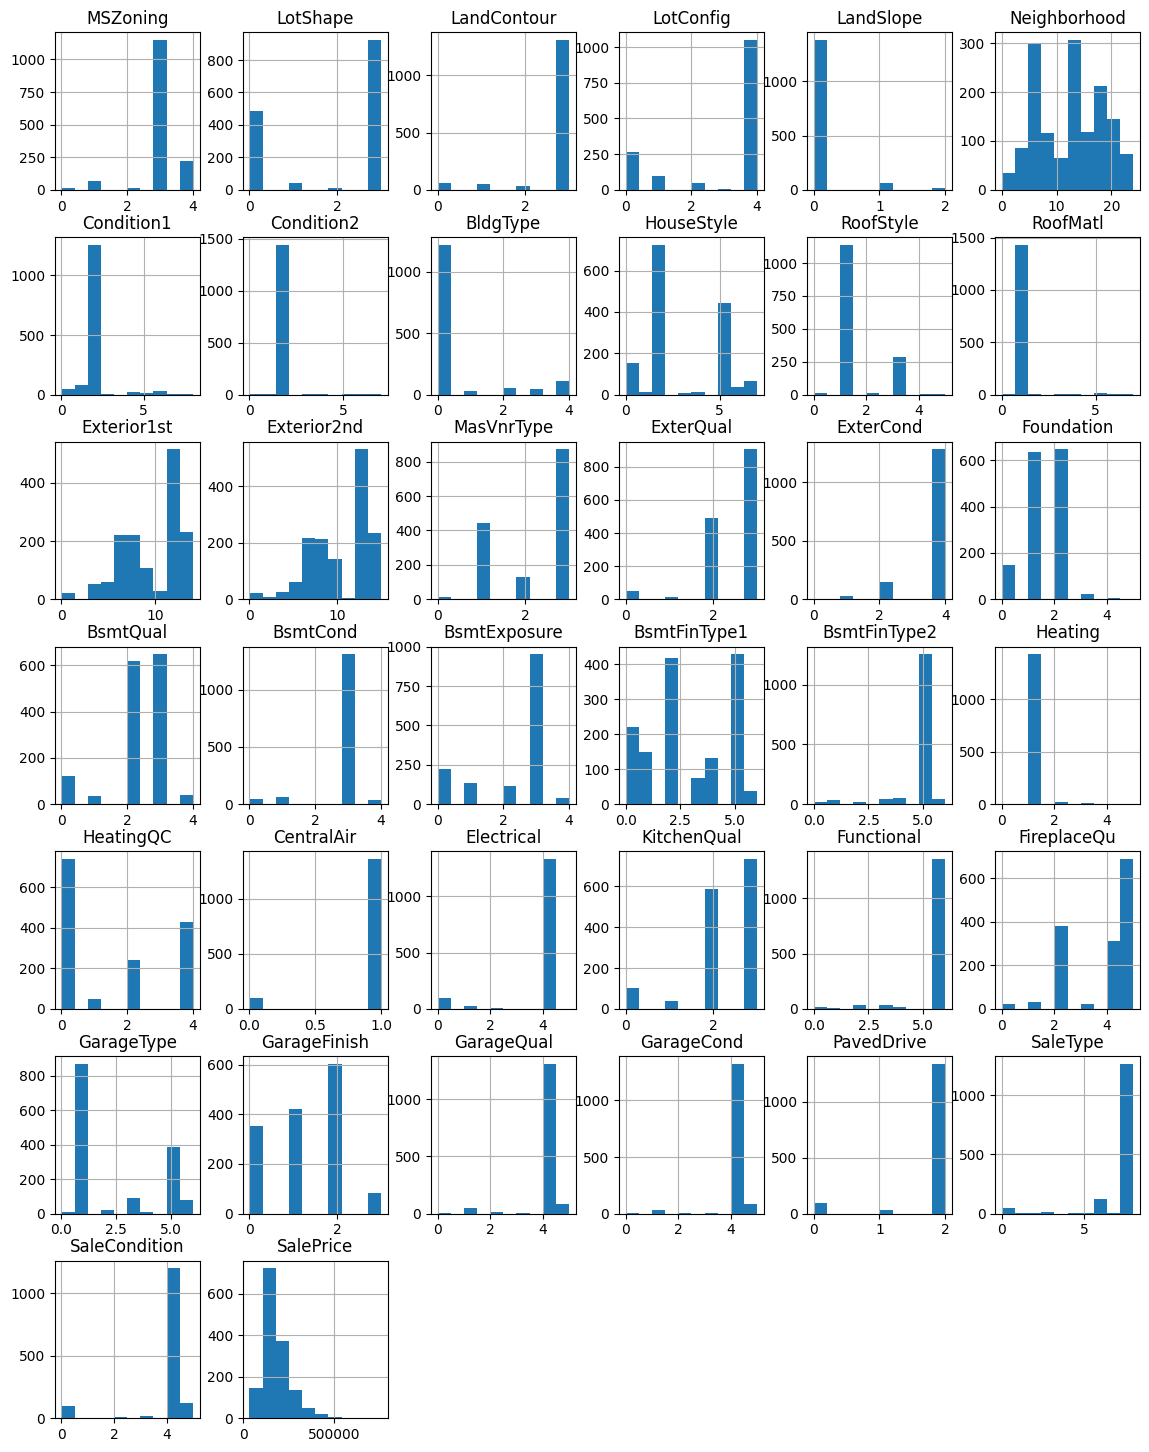

In [231]:
df_obj.hist(figsize=(14, 18))
plt.show()